<h1>Insurance Price Prediction</h1>
A simple linear regression model to predict Insurance price of a certain customer using different features

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1.Identifying Target Variable?
In our case it is feature-"charges"
### 2.Check Distribution of Target Variable

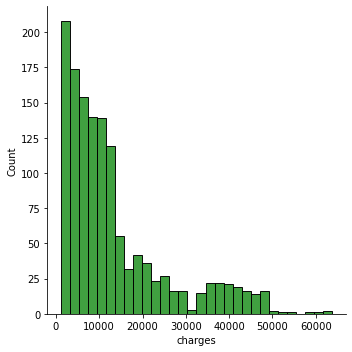

In [63]:
sns.displot(df['charges'],color="green")

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Check For Nulls

In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Hence,no null values just one row with empty string 

In [30]:
x=df[df['smoker']==' '].index
df.drop(index=x,inplace=True)

In [33]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [34]:
def gender(data):
    if data=='male':
        return 0
    return 1

In [38]:
df['sex']=df['sex'].apply(gender)

In [39]:
def smoker(inp):
    if inp=='yes':
        return 1
    return 0

In [45]:
df['smoker']=df['smoker'].replace({'yes':1,'no':2})

In [42]:
df['region'].value_counts()

southeast    363
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [48]:
df['region']=df['region'].replace({'northwest':1,'northeast':2,'southwest':3,'southeast':4})

In [49]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,2,4,1725.55230
2,28,0,33.000,3,2,4,4449.46200
3,33,0,22.705,0,2,1,21984.47061
4,32,0,28.880,0,2,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,2,1,10600.54830
1334,18,1,31.920,0,2,2,2205.98080
1335,18,1,36.850,0,2,4,1629.83350
1336,21,1,25.800,0,2,3,2007.94500


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('charges',axis=1),df['charges'],test_size=0.2,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression

In [59]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [65]:
predicted=regressor.predict(X_test)

<AxesSubplot:xlabel='charges'>

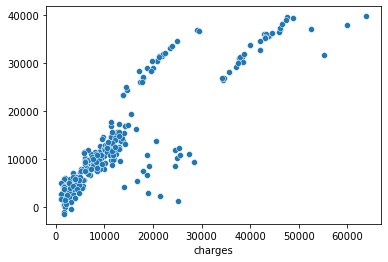

In [70]:
sns.scatterplot(x=y_test,y=predicted)

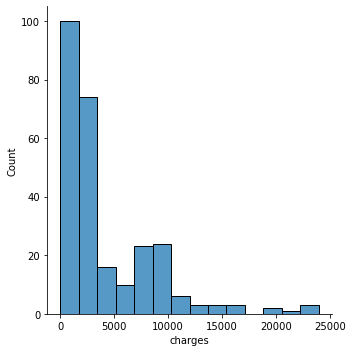

In [71]:
#Distribution of Error
sns.displot(abs(y_test-predicted))

In [72]:
from sklearn.metrics import r2_score

In [73]:
r2_score(y_test,predicted)

0.7658197551669916

In [74]:
##For User

In [76]:
age=int(input("Enter Age:"))
sex=int(input("Enter sex(0 for male,1 for female):"))
smoker=int(input("User is smoker(1 for yes,0 for no)"))
bmi=float(input("Enter bmi"))
children=int(input("Enter number of children"))
region=int(input("Enter Region:(1-NW,2-NE,3-SW,4-SE)"))
l=[age,sex,bmi,children,smoker,region]


Enter Age:18
Enter sex(0 for male,1 for female):0
User is smoker(1 for yes,0 for no)1
Enter bmi3
Enter number of children0
Enter Region:(1-NW,2-NE,3-SW,4-SE)1


In [98]:
output=regressor.predict(pd.DataFrame(l).transpose())
print("Predcited Charges : ",output)

Predcited Charges :  [17907.99174838]
